In [201]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

In [202]:
!pip install -q scann

In [203]:
from typing import Dict, Text

import os
import pprint
import tempfile

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [204]:
import tensorflow_recommenders as tfrs

In [205]:
#from typing import Dict, Text

#import tensorflow as tf
#import tensorflow_datasets as tfds
#import tensorflow_recommenders as tfrs

In [206]:
#!pip install -q --upgrade tensorflow-datasets

In [207]:
#!pip install --upgrade tensorflow-recommenders

In [208]:
#!pip install -q scann

In [209]:
#!pip install --upgrade  tensorflow

In [210]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.sparse as sp
from scipy.sparse import vstack
from scipy import sparse
from scipy.sparse.linalg import spsolve

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from pathlib import Path
import pandas as pd
import numpy as np
import random
from IPython.display import Image
from IPython.core.display import HTML 
import pdb;

from subprocess import check_output
from sklearn.model_selection import train_test_split
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

# Importing Libraries and cookbooks
from recsys import *## recommender system cookbook
#from generic_preprocessing import * ## pre-processing code
from IPython.display import HTML ## Setting display options for Ipython Notebook
from itertools import combinations, chain, product

In [211]:
demo = pd.read_csv("demo001.csv",sep="|")

demo.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_CTE,FECHA_NAC,GENERO,EDO_CIVIL,D_EDO,DESC_D_EDO,D_NC,DESC_D_NC,TP_HOGAR,T_HOGAR,...,FECHADIFCOBRO,SDOCTAPERDIDA,FECHACORTE,TIPOTELEFONO,NUMEROTELEFONOORIGEN,NUMEROTELEFONO,CARRIER,DES_CORREOELECTRONICO,DES_ORIGEN,SAMPLING
0,2746824,1952-09-22 00:00:00.000000,F,C,9.0,AGUASCALIENTES,36.0,AGUASCALIENTES,P,1988-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,1.0,9.130889e+06,4.499131e+09,0.0,CONCHITAGUILAR2@GMAIL.COM,Coppel.com en tienda,0.004464
1,6572723,1958-11-04 00:00:00.000000,F,C,10.0,JALISCO,67.0,TONALA,P,1992-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,4.0,6.170833e+06,3.336171e+09,0.0,MOGLEZZB1102@HOTMAIL.COM,Tienda,0.005916
2,12334731,1980-03-14 00:00:00.000000,M,C,23.0,VERACRUZ,40.0,CORDOBA,R,2012-01-01 00:00:00.000000,...,2011-08-31 00:00:00.000000,0.0,2020-07-31 00:00:00.000000,1.0,2.711111e+09,2.711111e+09,0.0,JORGECONTRERAS_08@HOTMAIL.COM,Tienda,0.003026
3,12408172,1968-02-19 00:00:00.000000,M,S,18.0,PUEBLA,85.0,ATLIXCO,P,2007-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,1.0,0.000000e+00,2.444463e+09,0.0,MARIO_1018@HOTMAIL.COM,Coppel.com,0.002311
4,24428035,1950-03-18 00:00:00.000000,M,D,25.0,DISTRITO FEDERAL,107.0,IZTAPALAPA,F,2003-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,3.0,5.541973e+09,5.541973e+09,0.0,BARBIE_COMEX@HOTMAIL.COM,CAT,0.008750
5,42979358,1963-10-12 00:00:00.000000,M,S,15.0,ZACATECAS,273.0,SOMBRERETE,P,1978-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,4.331055e+09,4.331055e+09,39.0,B.LINDA.MORALES@GMAIL.COM,Tienda,0.007626
6,49727061,1970-02-17 00:00:00.000000,F,C,4.0,BAJA CALIFORNIA NORTE,64.0,ENSENADA,P,2010-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,5.562271e+09,5.562271e+09,39.0,LOLISMAGA_24@HOTMAIL.COM,Tienda,0.006580
7,26835752,1984-06-14 00:00:00.000000,F,C,23.0,VERACRUZ,183.0,TUXPAN,P,2013-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,7.681044e+09,7.681044e+09,39.0,NaN,NaN,0.007558
8,25066445,1974-10-12 00:00:00.000000,F,C,22.0,HIDALGO,316.0,MINERAL DE LA R,P,2019-12-09 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,2.0,5.520714e+09,5.520714e+09,39.0,NaN,NaN,0.009830
9,46495652,1986-11-02 00:00:00.000000,M,S,31.0,OAXACA,384.0,LOMA BONITA,P,2004-01-01 00:00:00.000000,...,NaN,0.0,2020-07-31 00:00:00.000000,5.0,2.871169e+09,2.871169e+09,0.0,NaN,NaN,0.002984


In [212]:
from datetime import datetime
from datetime import date

In [213]:
demo["Fecha_Nac"]=pd.to_datetime(demo["FECHA_NAC"], format='%Y-%m-%d %H:%M')
demo["Fecha_Nac"].head(5)

0   1952-09-22
1   1958-11-04
2   1980-03-14
3   1968-02-19
4   1950-03-18
Name: Fecha_Nac, dtype: datetime64[ns]

In [214]:
hoy=datetime.now().year
def age(fecnan):
    return (hoy-fecnan.year)

demo["Edad"]=demo["Fecha_Nac"].apply(age)
demo["Edad"].head(5)

0    69.0
1    63.0
2    41.0
3    53.0
4    71.0
Name: Edad, dtype: float64

In [215]:
demo["edad"]=pd.cut(demo['Edad'], [0,25,35,45,55,65,90]).astype(str)
demo.head()

,ID_CTE,FECHA_NAC,GENERO,EDO_CIVIL,D_EDO,DESC_D_EDO,D_NC,DESC_D_NC,TP_HOGAR,T_HOGAR,...,TIPOTELEFONO,NUMEROTELEFONOORIGEN,NUMEROTELEFONO,CARRIER,DES_CORREOELECTRONICO,DES_ORIGEN,SAMPLING,Fecha_Nac,Edad,edad
0,2746824,1952-09-22 00:00:00.000000,F,C,9.0,AGUASCALIENTES,36.0,AGUASCALIENTES,P,1988-01-01 00:00:00.000000,...,1.0,9.130889e+06,4.499131e+09,0.0,CONCHITAGUILAR2@GMAIL.COM,Coppel.com en tienda,0.004464,1952-09-22,69.0,"(65.0, 90.0]"
1,6572723,1958-11-04 00:00:00.000000,F,C,10.0,JALISCO,67.0,TONALA,P,1992-01-01 00:00:00.000000,...,4.0,6.170833e+06,3.336171e+09,0.0,MOGLEZZB1102@HOTMAIL.COM,Tienda,0.005916,1958-11-04,63.0,"(55.0, 65.0]"
2,12334731,1980-03-14 00:00:00.000000,M,C,23.0,VERACRUZ,40.0,CORDOBA,R,2012-01-01 00:00:00.000000,...,1.0,2.711111e+09,2.711111e+09,0.0,JORGECONTRERAS_08@HOTMAIL.COM,Tienda,0.003026,1980-03-14,41.0,"(35.0, 45.0]"
3,12408172,1968-02-19 00:00:00.000000,M,S,18.0,PUEBLA,85.0,ATLIXCO,P,2007-01-01 00:00:00.000000,...,1.0,0.000000e+00,2.444463e+09,0.0,MARIO_1018@HOTMAIL.COM,Coppel.com,0.002311,1968-02-19,53.0,"(45.0, 55.0]"
4,24428035,1950-03-18 00:00:00.000000,M,D,25.0,DISTRITO FEDERAL,107.0,IZTAPALAPA,F,2003-01-01 00:00:00.000000,...,3.0,5.541973e+09,5.541973e+09,0.0,BARBIE_COMEX@HOTMAIL.COM,CAT,0.008750,1950-03-18,71.0,"(65.0, 90.0]"


In [216]:
demo["NDepen"]=demo['N_D_EC'].apply(lambda x: 0 if x == 0 else 1).astype(str)
demo.head()

,ID_CTE,FECHA_NAC,GENERO,EDO_CIVIL,D_EDO,DESC_D_EDO,D_NC,DESC_D_NC,TP_HOGAR,T_HOGAR,...,NUMEROTELEFONOORIGEN,NUMEROTELEFONO,CARRIER,DES_CORREOELECTRONICO,DES_ORIGEN,SAMPLING,Fecha_Nac,Edad,edad,NDepen
0,2746824,1952-09-22 00:00:00.000000,F,C,9.0,AGUASCALIENTES,36.0,AGUASCALIENTES,P,1988-01-01 00:00:00.000000,...,9.130889e+06,4.499131e+09,0.0,CONCHITAGUILAR2@GMAIL.COM,Coppel.com en tienda,0.004464,1952-09-22,69.0,"(65.0, 90.0]",0
1,6572723,1958-11-04 00:00:00.000000,F,C,10.0,JALISCO,67.0,TONALA,P,1992-01-01 00:00:00.000000,...,6.170833e+06,3.336171e+09,0.0,MOGLEZZB1102@HOTMAIL.COM,Tienda,0.005916,1958-11-04,63.0,"(55.0, 65.0]",1
2,12334731,1980-03-14 00:00:00.000000,M,C,23.0,VERACRUZ,40.0,CORDOBA,R,2012-01-01 00:00:00.000000,...,2.711111e+09,2.711111e+09,0.0,JORGECONTRERAS_08@HOTMAIL.COM,Tienda,0.003026,1980-03-14,41.0,"(35.0, 45.0]",1
3,12408172,1968-02-19 00:00:00.000000,M,S,18.0,PUEBLA,85.0,ATLIXCO,P,2007-01-01 00:00:00.000000,...,0.000000e+00,2.444463e+09,0.0,MARIO_1018@HOTMAIL.COM,Coppel.com,0.002311,1968-02-19,53.0,"(45.0, 55.0]",0
4,24428035,1950-03-18 00:00:00.000000,M,D,25.0,DISTRITO FEDERAL,107.0,IZTAPALAPA,F,2003-01-01 00:00:00.000000,...,5.541973e+09,5.541973e+09,0.0,BARBIE_COMEX@HOTMAIL.COM,CAT,0.008750,1950-03-18,71.0,"(65.0, 90.0]",0


In [217]:
df_demo=demo.loc[:,('ID_CTE', "GENERO", 'EDO_CIVIL',"edad","NDepen","TP_HOGAR")]
df_demo["user_id"]=df_demo["ID_CTE"].astype(str)
df_demo.head(10)


,ID_CTE,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR,user_id
0,2746824,F,C,"(65.0, 90.0]",0,P,2746824
1,6572723,F,C,"(55.0, 65.0]",1,P,6572723
2,12334731,M,C,"(35.0, 45.0]",1,R,12334731
3,12408172,M,S,"(45.0, 55.0]",0,P,12408172
4,24428035,M,D,"(65.0, 90.0]",0,F,24428035
5,42979358,M,S,"(55.0, 65.0]",1,P,42979358
6,49727061,F,C,"(45.0, 55.0]",1,P,49727061
7,26835752,F,C,"(35.0, 45.0]",0,P,26835752
8,25066445,F,C,"(45.0, 55.0]",0,P,25066445
9,46495652,M,S,"(25.0, 35.0]",1,P,46495652


In [218]:
tran = pd.read_csv("transactional001.csv",sep="|")

tran.head(10)

,ID_CTE,FECHA_TICKET,ID_TIENDA,ID_TICKET,PROD_SKU,PROD_DEP,DESC_PROD_DEP,PROD_CLAS,DESC_PROD_CLAS,PROD_FAM,DESC_PROD_FAM,PROD_AREA,PROD_CATEGORIA,DESC_PROD_CATEGORIA,IMPORTE_VTA,CANTIDAD_VTA,PROD_PRECIO_PROMEDIO,TIPOCOMPRA,FECHACORTE
0,145035,2017-10-02 00:00:00.000000,3,133548,-99,-99,Sin Descripcion,-99,Sin Descripcion,-99,Sin Descripcion,Prestamos,-99,Sin Descripcion,3448.00,1,3448.00,Credito,2017-10-31 00:00:00.000000
1,145035,2018-05-08 00:00:00.000000,1252,7400,-99,-99,Sin Descripcion,-99,Sin Descripcion,-99,Sin Descripcion,Prestamos,-99,Sin Descripcion,5646.00,1,5646.00,Credito,2018-05-31 00:00:00.000000
2,145035,2019-08-23 00:00:00.000000,3,48708,215063,2,ELECTRONICA,24,TELEFONOS CELULARES,85,AT.T,Muebles,1,Celulares,2154.32,1,2154.32,Credito,2019-08-31 00:00:00.000000
3,145035,2019-09-20 00:00:00.000000,5,23998,800404,8,ZAPATERIA,60,ZAPATO DAMA T 22.5-27,48,SENORA CONFORT,Ropa,17,Zapato Dama,603.00,1,603.00,Credito,2019-09-30 00:00:00.000000
4,145035,2020-01-13 00:00:00.000000,2,171365,-99,-99,Sin Descripcion,-99,Sin Descripcion,-99,Sin Descripcion,Prestamos,-99,Sin Descripcion,17241.00,1,17241.00,Credito,2020-01-31 00:00:00.000000
5,558561,2017-03-17 00:00:00.000000,119,505516,340634,3,MUEBLE SUELTO,30,JARDIN,11,MESA PLEGABLE,Muebles,3,Hogar,1119.83,1,1119.83,Credito,2017-03-31 00:00:00.000000
6,558561,2017-10-17 00:00:00.000000,119,526127,236785,2,ELECTRONICA,29,CHIPS CELULARES,11,CHIP 4G MULTIFORMATO,Muebles,1,Celulares,0.00,1,0.00,Contado,2017-10-31 00:00:00.000000
7,558561,2017-10-17 00:00:00.000000,119,526127,236905,2,ELECTRONICA,95,ACCESORIOS CELULARES,2,MICAS,Muebles,1,Celulares,128.45,1,128.45,Credito,2017-10-31 00:00:00.000000
8,558561,2017-10-17 00:00:00.000000,119,526127,253311,2,ELECTRONICA,24,TELEFONOS CELULARES,9,TELCEL R2,Muebles,1,Celulares,2671.55,1,2671.55,Credito,2017-10-31 00:00:00.000000
9,558561,2017-10-17 00:00:00.000000,119,526127,296475,2,ELECTRONICA,95,ACCESORIOS CELULARES,27,PROTECTOR DE PANTALLA VIDRIO,Muebles,1,Celulares,171.55,1,171.55,Credito,2017-10-31 00:00:00.000000


In [219]:
df_tran=tran[((tran["PROD_AREA"]=="Muebles")  | (tran["PROD_AREA"]=="Ropa"))&((tran["IMPORTE_VTA"]>100))]


In [220]:
df_tran["area"]=df_tran["PROD_AREA"].apply(lambda x: 1 if x == 'Ropa' else 2) 
df_tran["fam"]=df_tran["area"].astype(str)+df_tran["PROD_DEP"].astype(str)+df_tran["PROD_CLAS"].astype(str).str.zfill(2)+df_tran["PROD_FAM"].astype(str).str.zfill(3)
df_tran["clas"]=df_tran["area"].astype(str)+df_tran["PROD_DEP"].astype(str)+df_tran["PROD_CLAS"].astype(str).str.zfill(2)
df_tran["idclas"]=df_tran["clas"]
df_tran["idfam"]=df_tran["fam"]
df_tran["movie_id"]=df_tran["fam"].astype(str)#df_tran["DESC_PROD_DEP"]#
df_tran["user_id"]=df_tran["ID_CTE"].astype(str)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [221]:
df_f=df_tran.loc[:,('user_id', 'FECHA_TICKET', 'movie_id')].groupby(['user_id',"movie_id"]).size().reset_index()
df_f.head(10)

,user_id,movie_id,0
0,10000040,1105068,1
1,10000040,1204616,1
2,10000040,1701216,1
3,10000040,1863254,2
4,10000212,1106055,3
5,10000212,1867308,2
6,10000212,1869214,1
7,10000212,2224057,1
8,10000292,1101650,1
9,10000292,1312150,1


In [222]:
df_f1=df_f[:50000]

In [223]:
dff1=pd.merge(df_f1, df_demo, on='user_id', how='inner')

dff1.head(10)

,user_id,movie_id,0,ID_CTE,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,1,10000040,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,1,10000040,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,1,10000040,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,2,10000040,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,3,10000212,M,S,"(35.0, 45.0]",0,P
5,10000212,1867308,2,10000212,M,S,"(35.0, 45.0]",0,P
6,10000212,1869214,1,10000212,M,S,"(35.0, 45.0]",0,P
7,10000212,2224057,1,10000212,M,S,"(35.0, 45.0]",0,P
8,10000292,1101650,1,10000292,M,U,"(45.0, 55.0]",1,P
9,10000292,1312150,1,10000292,M,U,"(45.0, 55.0]",1,P


In [224]:
df_1=dff1.dropna() 
df_1.head(10)

,user_id,movie_id,0,ID_CTE,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,1,10000040,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,1,10000040,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,1,10000040,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,2,10000040,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,3,10000212,M,S,"(35.0, 45.0]",0,P
5,10000212,1867308,2,10000212,M,S,"(35.0, 45.0]",0,P
6,10000212,1869214,1,10000212,M,S,"(35.0, 45.0]",0,P
7,10000212,2224057,1,10000212,M,S,"(35.0, 45.0]",0,P
8,10000292,1101650,1,10000292,M,U,"(45.0, 55.0]",1,P
9,10000292,1312150,1,10000292,M,U,"(45.0, 55.0]",1,P


In [225]:
dff=pd.DataFrame(df_1["movie_id"].unique())
dff["movie_id"]=dff[0].astype(str)
dff.head()

,0,movie_id
0,1105068,1105068
1,1204616,1204616
2,1701216,1701216
3,1863254,1863254
4,1106055,1106055


In [226]:
prod = pd.read_csv("prod_variables.csv",sep=",")

prod.head(10)

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios
1,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios
2,1101004,CABALLEROS,ACCESORIOS,GORRA,Caballeros Accesorios,Caballeros Accesorios
3,1101027,CABALLEROS,ACCESORIOS,CINTO MODA,Caballeros Accesorios,Caballeros Accesorios
4,1101028,CABALLEROS,ACCESORIOS,CINTO VESTIR,Caballeros Accesorios,Caballeros Accesorios
5,1101063,CABALLEROS,ACCESORIOS,PAÑUELO,Caballeros Accesorios,Caballeros Accesorios
6,1101083,CABALLEROS,ACCESORIOS,PLUMAS,Caballeros Accesorios,Caballeros Accesorios
7,1101342,CABALLEROS,ACCESORIOS,MESSENGER,Caballeros Accesorios,Caballeros Accesorios
8,1101649,CABALLEROS,ACCESORIOS,LENTES SOLARES,Caballeros Accesorios,Caballeros Accesorios
9,1101650,CABALLEROS,ACCESORIOS,RELOJES,Caballeros Accesorios,Caballeros Accesorios


In [227]:
prod["movie_id"]=prod["id_Familia"].astype(str)
prod["id_Familia"]=prod["id_Familia"].astype(str)
prod.head()

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria,movie_id
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002
1,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003
2,1101004,CABALLEROS,ACCESORIOS,GORRA,Caballeros Accesorios,Caballeros Accesorios,1101004
3,1101027,CABALLEROS,ACCESORIOS,CINTO MODA,Caballeros Accesorios,Caballeros Accesorios,1101027
4,1101028,CABALLEROS,ACCESORIOS,CINTO VESTIR,Caballeros Accesorios,Caballeros Accesorios,1101028


In [228]:
dfff=df_1.loc[:,("user_id","movie_id","GENERO","EDO_CIVIL","edad","NDepen","TP_HOGAR")]
dfff.head(5)

,user_id,movie_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,M,S,"(35.0, 45.0]",0,P


In [229]:
dfp=pd.merge(dfff, prod, on='movie_id', how='inner')

dfp.head(10)

,user_id,movie_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria
0,10000040,1105068,M,S,"(35.0, 45.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
1,10000520,1105068,F,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
2,10001185,1105068,M,S,"(35.0, 45.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
3,10004981,1105068,M,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
4,10009338,1105068,F,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
5,10009900,1105068,M,C,"(55.0, 65.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
6,10016033,1105068,M,C,"(35.0, 45.0]",1,F,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
7,1001809,1105068,F,C,"(65.0, 90.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
8,10028459,1105068,F,C,"(45.0, 55.0]",1,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior
9,10029235,1105068,F,V,"(65.0, 90.0]",0,P,1105068,CABALLEROS,PLAYERA,MODA MC CR,Caballero Exterior,Caballero Exterior


In [230]:
dfpp=dff["movie_id"].unique()#pd.DataFrame({"movie_id" : dff.loc[:,("movie_id")]})#dff["movie_id"].unique()#dfp.loc[:,"movie_id"]
dfpp

array(['1105068', '1204616', '1701216', ..., '2296010', '2509015',
       '1542038'], dtype=object)

In [231]:
dfff=df_1.loc[:,("user_id","movie_id","GENERO","EDO_CIVIL","edad","NDepen","TP_HOGAR")]
dfff.head(5)

,user_id,movie_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,10000040,1105068,M,S,"(35.0, 45.0]",0,P
1,10000040,1204616,M,S,"(35.0, 45.0]",0,P
2,10000040,1701216,M,S,"(35.0, 45.0]",0,P
3,10000040,1863254,M,S,"(35.0, 45.0]",0,P
4,10000212,1106055,M,S,"(35.0, 45.0]",0,P


In [232]:
dfp=pd.merge(prod,dfff, on='movie_id', how='inner')#df_1.loc[:,("user_id","movie_id","GENERO","EDO_CIVIL","edad","NDepen","TP_HOGAR")]
dfp.head(5)

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria,movie_id,user_id,GENERO,EDO_CIVIL,edad,NDepen,TP_HOGAR
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002,10020036,M,U,"(35.0, 45.0]",1,F
1,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002,10635891,M,C,"(35.0, 45.0]",1,P
2,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,10016033,M,C,"(35.0, 45.0]",1,F
3,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,10059362,F,S,"(35.0, 45.0]",0,P
4,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003,1007701,F,C,"(45.0, 55.0]",0,P


In [233]:
dfmo=pd.DataFrame({"movie_id" : dff.loc[:,("movie_id")]})#dff["movie_id"].unique()#dfp.loc[:,"movie_id"]
dfmovie=pd.merge(prod,dfmo, on='movie_id', how='inner')
dfmovie.head()

,id_Familia,Departamento,Clase,Familia,Categoria,Subcategoria,movie_id
0,1101002,CABALLEROS,ACCESORIOS,NOVEDADES,Caballeros Accesorios,Caballeros Accesorios,1101002
1,1101003,CABALLEROS,ACCESORIOS,BILLETERA,Caballeros Accesorios,Caballeros Accesorios,1101003
2,1101004,CABALLEROS,ACCESORIOS,GORRA,Caballeros Accesorios,Caballeros Accesorios,1101004
3,1101027,CABALLEROS,ACCESORIOS,CINTO MODA,Caballeros Accesorios,Caballeros Accesorios,1101027
4,1101028,CABALLEROS,ACCESORIOS,CINTO VESTIR,Caballeros Accesorios,Caballeros Accesorios,1101028


In [234]:
dfff.dtypes

user_id      object
movie_id     object
GENERO       object
EDO_CIVIL    object
edad         object
NDepen       object
TP_HOGAR     object
dtype: object

In [235]:
#target = dfff.pop("movie_id")

In [236]:
ratings = tf.data.Dataset.from_tensor_slices((dfp.to_dict('list')))

In [237]:
#ratings = tf.data.Dataset.from_tensor_slices((dfff.values))

In [238]:
ratings.take(10)

<TakeDataset shapes: {id_Familia: (), Departamento: (), Clase: (), Familia: (), Categoria: (), Subcategoria: (), movie_id: (), user_id: (), GENERO: (), EDO_CIVIL: (), edad: (), NDepen: (), TP_HOGAR: ()}, types: {id_Familia: tf.string, Departamento: tf.string, Clase: tf.string, Familia: tf.string, Categoria: tf.string, Subcategoria: tf.string, movie_id: tf.string, user_id: tf.string, GENERO: tf.string, EDO_CIVIL: tf.string, edad: tf.string, NDepen: tf.string, TP_HOGAR: tf.string}>

In [239]:
ratings

<TensorSliceDataset shapes: {id_Familia: (), Departamento: (), Clase: (), Familia: (), Categoria: (), Subcategoria: (), movie_id: (), user_id: (), GENERO: (), EDO_CIVIL: (), edad: (), NDepen: (), TP_HOGAR: ()}, types: {id_Familia: tf.string, Departamento: tf.string, Clase: tf.string, Familia: tf.string, Categoria: tf.string, Subcategoria: tf.string, movie_id: tf.string, user_id: tf.string, GENERO: tf.string, EDO_CIVIL: tf.string, edad: tf.string, NDepen: tf.string, TP_HOGAR: tf.string}>

In [240]:
dfr = tfds.as_dataframe(ratings.take(10))
dfr.head()

,Categoria,Clase,Departamento,EDO_CIVIL,Familia,GENERO,NDepen,Subcategoria,TP_HOGAR,edad,id_Familia,movie_id,user_id
0,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'U',b'NOVEDADES',b'M',b'1',b'Caballeros Accesorios',b'F',"b'(35.0, 45.0]'",b'1101002',b'1101002',b'10020036'
1,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'C',b'NOVEDADES',b'M',b'1',b'Caballeros Accesorios',b'P',"b'(35.0, 45.0]'",b'1101002',b'1101002',b'10635891'
2,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'C',b'BILLETERA',b'M',b'1',b'Caballeros Accesorios',b'F',"b'(35.0, 45.0]'",b'1101003',b'1101003',b'10016033'
3,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'S',b'BILLETERA',b'F',b'0',b'Caballeros Accesorios',b'P',"b'(35.0, 45.0]'",b'1101003',b'1101003',b'10059362'
4,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'C',b'BILLETERA',b'F',b'0',b'Caballeros Accesorios',b'P',"b'(45.0, 55.0]'",b'1101003',b'1101003',b'1007701'


In [241]:
#movies= tf.data.Dataset.from_tensor_slices((dfpp))#.to_dict('list')))

In [242]:
movies= tf.data.Dataset.from_tensor_slices((dfmovie.to_dict('list')))

In [480]:
dfm = tfds.as_dataframe(movies)
dfm.head()

,Categoria,Clase,Departamento,Familia,Subcategoria,id_Familia,movie_id
0,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'NOVEDADES',b'Caballeros Accesorios',b'1101002',b'1101002'
1,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'BILLETERA',b'Caballeros Accesorios',b'1101003',b'1101003'
2,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'GORRA',b'Caballeros Accesorios',b'1101004',b'1101004'
3,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'CINTO MODA',b'Caballeros Accesorios',b'1101027',b'1101027'
4,b'Caballeros Accesorios',b'ACCESORIOS',b'CABALLEROS',b'CINTO VESTIR',b'Caballeros Accesorios',b'1101028',b'1101028'


In [244]:
user_ids_vocabulary = tf.keras.layers.experimental.preprocessing.StringLookup(mask_token=None)
user_ids_vocabulary.adapt(ratings.map(lambda x: x["user_id"]))
#y=ratings.map(lambda x: x["user_id"])

movie_titles_vocabulary = tf.keras.layers.experimental.preprocessing.StringLookup(mask_token=None)
movie_titles_vocabulary.adapt(movies.map(lambda x: x["movie_id"]))

In [264]:
#timestamps = np.concatenate(list(ratings.map(lambda x: x["GENERO"].astype(int)).batch(50)))

#max_timestamp = timestamps.max()
#min_timestamp = timestamps.min()

#timestamp_buckets = np.linspace(
 #   min_timestamp, max_timestamp, num=100,
#)

gen= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["GENERO"]))))

EC= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["EDO_CIVIL"]))))

ED= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["edad"]))))

DE= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["NDepen"]))))


TP= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["TP_HOGAR"]))))

cat= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["Categoria"]))))

fam= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["Familia"]))))


unique_movie_titles = np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["movie_id"]))))
unique_user_ids = np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["user_id"]))))

In [265]:
class UserModel(tf.keras.Model):
  
  def __init__(self, use_timestamps):
    super().__init__()

    self._use_timestamps = use_timestamps

    self.user_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
            vocabulary=unique_user_ids, mask_token=None),
        tf.keras.layers.Embedding(len(unique_user_ids) + 1, 32),
    ])

    if use_timestamps:
      self.timestamp_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=timestamps, mask_token=None),
      tf.keras.layers.Embedding(len(timestamps) + 1, 32)
        ])
    
      self.EC_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=EC, mask_token=None),
      tf.keras.layers.Embedding(len(EC) + 1, 32)
        ])
        
      self.ED_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=ED, mask_token=None),
      tf.keras.layers.Embedding(len(ED) + 1, 32)
        ])
    
      self.DE_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=DE, mask_token=None),
      tf.keras.layers.Embedding(len(DE) + 1, 32)
        ])
        
      self.TP_embedding = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=TP, mask_token=None),
      tf.keras.layers.Embedding(len(TP) + 1, 32)
       ])

  def call(self, inputs):
    if not self._use_timestamps:
      return self.user_embedding(inputs["user_id"])
    #tf.print(inputs["user_id"])
    return tf.concat([
            self.user_embedding(inputs["user_id"]),
            self.timestamp_embedding(inputs["GENERO"]),
            self.EC_embedding(inputs["EDO_CIVIL"]),
            self.ED_embedding(inputs["edad"]),
            self.DE_embedding(inputs["NDepen"]),
            self.TP_embedding(inputs["TP_HOGAR"])
            ], axis=1)

In [266]:
class MovieModel(tf.keras.Model):
  
  def __init__(self,use_timestamps):
    super().__init__()
    self._use_timestamps = use_timestamps
    max_tokens = 10_000
    self.inp_movie_id = tf.keras.Input(dtype="string",shape=3)
    self.title_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
          vocabulary =unique_movie_titles, mask_token=None,name ="Stringlooktitle")(self.inp_movie_id)
    self.title_embedding =  tf.keras.layers.Embedding(len(unique_movie_titles) + 1, 32,name="t_embedding")(self.title_lookup)

    
    self.title_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
        max_tokens=max_tokens)


    
    self.intermediate_model = tf.keras.Sequential([
      self.title_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
    ])
    self.title_text_embedding = self.intermediate_model

    #self.title_vectorizer.adapt(movies)
    self.title_vectorizer.adapt(ratings.map(lambda x: x["movie_id"]))
    if use_timestamps:
        self.cat_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=cat, mask_token=None),
        tf.keras.layers.Embedding(len(cat) + 1, 32)
        ])
        
        self.fam_embedding = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=fam, mask_token=None),
        tf.keras.layers.Embedding(len(fam) + 1, 32)
        ])
  self.title_embedding =tf.keras.Models(input=self.inp_movie_id,output=self.title_embedding)    
   # def call(self, inputs):
    #if not self._use_timestamps:
     # return self.title_embedding(titles["movie_id"]),
      #  self.title_text_embedding(titles["movie_id"])
    
  def call(self, titles):
    if not self._use_timestamps:
      return self.title_embedding(titles["movie_id"]) #tf.concat([
#self.title_embedding(titles["movie_id"]),
 #           self.title_text_embedding(titles["movie_id"]),
  #      ], axis=1)

      #tf.print(titles["movie_id"])
    return tf.concat([
            self.title_embedding(titles.map(lambda x:x["movie_id"])),
            #self.title_text_embedding(titles["movie_id"]),
            self.cat_embedding(titles.map(lambda x:x["Categoria"])),
            self.fam_embedding(titles.map(lambda x:x["Familia"]))
            ], axis=1)

AttributeError: module 'tensorflow.keras' has no attribute 'Models'

In [317]:
max_tokens = 10_000
inp_user_id = tf.keras.Input(dtype="string",shape=1,name="user_id")
#Categoria = tf.keras.Input(dtype="string",shape=1)
#Familia = tf.keras.Input(dtype="string",shape=1)
user_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary =unique_user_ids, mask_token=None,name ="Stringlooktitle")(inp_user_id)

user_embedding =  tf.keras.layers.Embedding(len(unique_user_ids) + 1, 32,name="t_embedding")(user_lookup)
user_embed_model = tf.keras.models.Model(inputs=inp_user_id, outputs=user_embedding)
print(user_embed_model.summary())

Model: "model_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
user_id (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Stringlooktitle (StringLooku (None, 1)                 0         
_________________________________________________________________
t_embedding (Embedding)      (None, 1, 32)             92256     
Total params: 92,256
Trainable params: 92,256
Non-trainable params: 0
_________________________________________________________________
None


In [318]:
gen= np.unique(np.concatenate(list(ratings.batch(5_0).map(
    lambda x: x["GENERO"]))))


In [327]:
max_tokens = 10_000
inp_genero = tf.keras.Input(dtype="string",shape=1,name="GENERO")
gen_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=gen, mask_token=None) (inp_genero)
gen_embedding =tf.keras.layers.Embedding(len(gen) + 1, 32)(gen_lookup)
gen_embed_model = tf.keras.models.Model(inputs=inp_genero, outputs=gen_embedding)


inp_ec = tf.keras.Input(dtype="string",shape=1,name="EDO_CIVIL")
ec_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=EC, mask_token=None) (inp_ec)
ec_embedding =tf.keras.layers.Embedding(len(EC) + 1, 32)(ec_lookup)
ec_embed_model = tf.keras.models.Model(inputs=inp_ec, outputs=ec_embedding)

inp_edad = tf.keras.Input(dtype="string",shape=1,name="edad")
edad_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=ED, mask_token=None) (inp_edad)
edad_embedding =tf.keras.layers.Embedding(len(ED) + 1, 32)(edad_lookup)
edad_embed_model = tf.keras.models.Model(inputs=inp_edad, outputs=edad_embedding)

inp_dep = tf.keras.Input(dtype="string",shape=1,name="NDepen")
dep_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=DE, mask_token=None) (inp_dep)
dep_embedding =tf.keras.layers.Embedding(len(DE) + 1, 32)(dep_lookup)
dep_embed_model = tf.keras.models.Model(inputs=inp_dep, outputs=dep_embedding)
#print(gen_embed_model.summary())
concatvaluser = tf.keras.layers.concatenate([user_embedding,gen_embedding,ec_embedding,edad_embedding,dep_embedding],axis=-1,name ="concat_user")

user_compressed = tf.keras.layers.Dense(32)(concatvaluser)
Flattenuser = tf.keras.layers.Flatten()(user_compressed)

#tf.keras.layers.Concatenate(
#    axis=-1
#)
concatmodeluser = tf.keras.models.Model(inputs=[inp_user_id,inp_genero,inp_ec,inp_edad,inp_dep], outputs=Flattenuser)
print(concatmodeluser.summary())

Model: "model_198"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
GENERO (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
EDO_CIVIL (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
edad (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________

In [ ]:

max_tokens = 10_000
inp_movie_id = tf.keras.Input(dtype="string",shape=1,name="movie_id")
Categoria = tf.keras.Input(dtype="string",shape=1,name="Categoria")
Familia = tf.keras.Input(dtype="string",shape=1,name="Familia")
title_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary =unique_movie_titles, mask_token=None,name ="Stringlooktitle")(inp_movie_id)

title_embedding =  tf.keras.layers.Embedding(len(unique_movie_titles) + 1, 32,name="t_embedding")(title_lookup)
title_embed_model = tf.keras.models.Model(inputs=inp_movie_id, outputs=title_embedding)
print(title_embed_model.summary())


cat_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=cat, mask_token=None) (Categoria)
cat_embedding =tf.keras.layers.Embedding(len(cat) + 1, 32)(cat_lookup)
cat_embed_model = tf.keras.models.Model(inputs=Categoria, outputs=cat_embedding)
print(title_embed_model.summary())


family_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=fam, mask_token=None) (Familia)
family_embedding =tf.keras.layers.Embedding(len(fam) + 1, 32)(family_lookup)
family_embed_model = tf.keras.models.Model(inputs=Familia, outputs=family_embedding)
print(family_embed_model.summary())



concatvalmovie = tf.keras.layers.concatenate([title_embedding,cat_embedding,family_embedding],axis=-1,name="concat_movie")
movie_compressed = tf.keras.layers.Dense(32, name="moviedensy")(concatvalmovie)

#tf.keras.layers.Concatenate(
#    axis=-1
#)


concatmodelmovie = tf.keras.models.Model(inputs=[inp_movie_id,Categoria,Familia], outputs=movie_compressed)



In [278]:
max_tokens = 10_000
inp_movie_id = tf.keras.Input(dtype="string",shape=1,name="movie_id")
Categoria = tf.keras.Input(dtype="string",shape=1,name="Categoria")
Familia = tf.keras.Input(dtype="string",shape=1,name="Familia")
title_lookup = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary =unique_movie_titles, mask_token=None,name ="Stringlooktitle")(inp_movie_id)

title_embedding =  tf.keras.layers.Embedding(len(unique_movie_titles) + 1, 32,name="t_embedding")(title_lookup)
title_embed_model = tf.keras.models.Model(inputs=inp_movie_id, outputs=title_embedding)
print(title_embed_model.summary())


cat_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=cat, mask_token=None) (Categoria)
cat_embedding =tf.keras.layers.Embedding(len(cat) + 1, 32)(cat_lookup)
cat_embed_model = tf.keras.models.Model(inputs=Categoria, outputs=cat_embedding)
print(title_embed_model.summary())


family_lookup =tf.keras.layers.experimental.preprocessing.StringLookup(
vocabulary=fam, mask_token=None) (Familia)
family_embedding =tf.keras.layers.Embedding(len(fam) + 1, 32)(family_lookup)
family_embed_model = tf.keras.models.Model(inputs=Familia, outputs=family_embedding)
print(family_embed_model.summary())

concatvalmovie = tf.keras.layers.concatenate([title_embedding,cat_embedding,family_embedding],axis=-1,name="concat_movie")
movie_compressed = tf.keras.layers.Dense(32, name="moviedensy")(concatvalmovie)
Flattenmovie = tf.keras.layers.Flatten()(movie_compressed)

#tf.keras.layers.Concatenate(
#    axis=-1
#)


concatmodelmovie = tf.keras.models.Model(inputs=[inp_movie_id,Categoria,Familia], outputs=Flattenmovie)
print(concatmodelmovie.summary())


Model: "model_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
movie_id (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
Stringlooktitle (StringLooku (None, 1)                 0         
_________________________________________________________________
t_embedding (Embedding)      (None, 1, 32)             52416     
Total params: 52,416
Trainable params: 52,416
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
movie_id (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
Stringlooktitle (StringLooku (None, 1)                 0         
_____________________________

In [280]:
valuemovie = tf.constant(b_dict["movie_id"])
valuecat = tf.constant(b_dict["Categoria"])
valuefam = tf.constant(b_dict["Familia"])

concatmodelmovie([b_dict["movie_id"],b_dict["Categoria"],b_dict["Familia"]])
print(concatmodel([valuemovie, valuecat, valuefam]))
#print(concatmodeluser([value,value2,value3,value4,value5]))

tf.Tensor(
[[[-3.60379331e-02  1.59132518e-02 -4.62810397e-02  1.44664384e-02
   -3.89011614e-02  4.27995808e-02 -1.50102489e-02 -2.16963775e-02
   -3.79054546e-02 -2.18208078e-02  3.75911109e-02 -3.06338668e-02
    2.63398401e-02  7.55347311e-04  4.39186953e-02  1.27038993e-02
   -4.81338762e-02  1.30729340e-02  3.08989175e-02 -1.72377340e-02
    3.44659425e-02 -3.43560129e-02 -1.81312077e-02 -4.52119373e-02
    2.23702230e-02  2.12659501e-02 -2.21222043e-02  3.27650048e-02
   -4.95385192e-02 -1.08007677e-02  2.05108784e-02 -8.06374475e-03
    1.96488611e-02  1.95377506e-02  1.05436556e-02 -1.98925491e-02
   -3.88094187e-02  1.68154724e-02  1.70460679e-02  2.97629721e-02
    1.69042982e-02  1.81495063e-02 -3.86849754e-02  4.79233600e-02
   -2.22625490e-02  6.17555529e-03  2.78681777e-02  2.87246369e-02
    2.88716704e-03  2.86804102e-02  4.18517701e-02 -4.79817390e-05
   -2.05657836e-02  1.23156905e-02  4.97257374e-02  1.22234449e-02
    2.06675567e-02 -4.58815806e-02  3.92385013e-02 

In [368]:
import sys

In [471]:
class MovielensModelManual(tfrs.models.Model):

  def __init__(self, usermod, moviemod):
    super().__init__()
    self.query_model = usermod
    self.candidate_model = moviemod
    self.task = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=movies.batch(128).map(self.candidate_model),
        ),
    )
    
  def compute_loss(self, features, training=False):
    # We only pass the user id and timestamp features into the query model. This
    # is to ensure that the training inputs would have the same keys as the
    # query inputs. Otherwise the discrepancy in input structure would cause an
    # error when loading the query model after saving it.
    
    print(features)
    query_embeddings = self.query_model({
        "user_id": features[0][0],
        "GENERO": features[0][1],
        "EDO_CIVIL": features[0][2],
        "edad": features[0][3],
        "NDepen": features[0][4]
                                            })
    #movie_embeddings = self.candidate_model(features["movie_id"])
    
    movie_embeddings = self.candidate_model({
       "movie_id": features[0][5],
       "Categoria": features[0][6],
        "Familia": features[0][7]                                         
        })
    
    #movie_embeddings = self.candidate_model(features["movie_title"])

    return self.task(query_embeddings, movie_embeddings)
  def call(self, features):
        return tf.concat([self.query_model({
        "user_id": features["user_id"],
        "GENERO": features["GENERO"],
        "EDO_CIVIL": features["EDO_CIVIL"],
        "edad": features["edad"],
         "NDepen": features["NDepen"]
                                            }),
            
            self.candidate_model(
        {
       "movie_id":features["movie_id"],
       "Categoria": features["Categoria"],
        "Familia": features["Familia"]                                         
        }
        
                                )],axis=1)

In [461]:
class MovielensModel(tfrs.models.Model):

  def __init__(self, use_timestamps):
    super().__init__()
    self.moviemod = MovieModel(use_timestamps)
    self.usermod = UserModel(use_timestamps, name ="usimod")
    self.query_model = tf.keras.Sequential([self.usermod.get_layer(name=)
       ,
      tf.keras.layers.Dense(32,name="usdensy")
    ])
    self.candidate_model = tf.keras.Sequential([
      self.moviemod,
      tf.keras.layers.Dense(32,name="candidensy")
    ])
    self.task = tfrs.tasks.Retrieval(
       metrics=tfrs.metrics.FactorizedTopK(
          candidates=movies.batch(128).map(self.candidate_model),
     ),
    )

  def compute_loss(self, features, training=False):
    # We only pass the user id and timestamp features into the query model. This
    # is to ensure that the training inputs would have the same keys as the
    # query inputs. Otherwise the discrepancy in input structure would cause an
    # error when loading the query model after saving it.
    query_embeddings = self.query_model({
        "user_id": features["user_id"],
        "GENERO": features["GENERO"],
        "EDO_CIVIL": features["EDO_CIVIL"],
        "edad": features["edad"],
         "NDepen": features["NDepen"],
         "TP_HOGAR": features["TP_HOGAR"]
                                            })
    #movie_embeddings = self.candidate_model(features["movie_id"])
    
    movie_embeddings = self.candidate_model(
        {
       "movie_id":features["movie_id"],
       "Categoria": features["Categoria"],
        "Familia": features["Familia"]                                         
        }
        
                                )
    
    #movie_embeddings = self.candidate_model(features["movie_title"])

    return self.task(query_embeddings, movie_embeddings)
  def call(self, features):
        return tf.concat([self.query_model({
        "user_id": features["user_id"],
        "GENERO": features["GENERO"],
        "EDO_CIVIL": features["EDO_CIVIL"],
        "edad": features["edad"],
         "NDepen": features["NDepen"],
         "TP_HOGAR": features["TP_HOGAR"]
                                            }),
            
            self.candidate_model(
        {
       "movie_id":features["movie_id"],
       "Categoria": features["Categoria"],
        "Familia": features["Familia"]                                         
        }
        
                                )],axis=1)

SyntaxError: invalid syntax (<ipython-input-461-3cb3c6612a80>, line 7)

In [444]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(1_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(8_000)
test = shuffled.skip(8_000).take(2_000)

cached_train = train.shuffle(1_000).batch(204)
cached_test = test.batch(406).cache()




In [445]:
a_dict= dict(tfds.as_dataframe(shuffled.take(1)).loc[0])
b_dict=tfds.as_dataframe(shuffled.take(2))[["movie_id","Categoria","Familia","user_id","GENERO","EDO_CIVIL","edad","NDepen"]].loc[0:7]

In [446]:
b_dict

,movie_id,Categoria,Familia,user_id,GENERO,EDO_CIVIL,edad,NDepen
0,b'1101342',b'Caballeros Accesorios',b'MESSENGER',b'10867058',b'F',b'S',"b'(45.0, 55.0]'",b'0'
1,b'1101004',b'Caballeros Accesorios',b'GORRA',b'10571455',b'F',b'S',"b'(35.0, 45.0]'",b'1'


In [447]:
value = tf.constant(b_dict["user_id"])
value2 = tf.constant(b_dict["GENERO"])
value3=tf.constant(b_dict["EDO_CIVIL"])
value4=tf.constant(b_dict["edad"])
value5=[tf.constant(b_dict["NDepen"])]
concatmodeluser([b_dict["user_id"],b_dict["GENERO"],b_dict["EDO_CIVIL"],b_dict["edad"],b_dict["NDepen"]])
#print(concatmodeluser([value,value2,value3,value4,value5]))

<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[ 0.00923864,  0.06011305,  0.01015238, -0.01097005, -0.00613218,
        -0.05868563, -0.022817  ,  0.0604555 , -0.03013798,  0.00114757,
        -0.03926226, -0.00630868, -0.09415785, -0.06661862,  0.02932318,
        -0.01235197,  0.05304184,  0.04805186,  0.02076339,  0.04474531,
         0.02642138, -0.02408853, -0.02535427,  0.05325811,  0.02574461,
         0.00513501,  0.00250216,  0.01433507, -0.04232704,  0.01328494,
        -0.01220859, -0.00756352],
       [ 0.0029154 ,  0.03947189, -0.01051828,  0.04323695, -0.00991293,
        -0.02133661,  0.0250462 , -0.0069646 , -0.00556255, -0.03028095,
        -0.01534232,  0.05100074, -0.04945096, -0.04912165,  0.0521984 ,
         0.03703431, -0.00935001,  0.03384054,  0.01091063,  0.08562028,
         0.01576425,  0.00832333,  0.00599469, -0.00597268, -0.0125302 ,
        -0.00805693, -0.0371385 , -0.01594171,  0.00722575, -0.03488132,
        -0.0432601 , -0.05616321]], dtyp

In [448]:




valuemovie = tf.constant(b_dict["movie_id"])
valuecat = tf.constant(b_dict["Categoria"])
valuefam = tf.constant(b_dict["Familia"])
print(concatmodel([valuemovie, valuecat, valuefam]))




tf.Tensor(
[[[-3.60379331e-02  1.59132518e-02 -4.62810397e-02  1.44664384e-02
   -3.89011614e-02  4.27995808e-02 -1.50102489e-02 -2.16963775e-02
   -3.79054546e-02 -2.18208078e-02  3.75911109e-02 -3.06338668e-02
    2.63398401e-02  7.55347311e-04  4.39186953e-02  1.27038993e-02
   -4.81338762e-02  1.30729340e-02  3.08989175e-02 -1.72377340e-02
    3.44659425e-02 -3.43560129e-02 -1.81312077e-02 -4.52119373e-02
    2.23702230e-02  2.12659501e-02 -2.21222043e-02  3.27650048e-02
   -4.95385192e-02 -1.08007677e-02  2.05108784e-02 -8.06374475e-03
    1.96488611e-02  1.95377506e-02  1.05436556e-02 -1.98925491e-02
   -3.88094187e-02  1.68154724e-02  1.70460679e-02  2.97629721e-02
    1.69042982e-02  1.81495063e-02 -3.86849754e-02  4.79233600e-02
   -2.22625490e-02  6.17555529e-03  2.78681777e-02  2.87246369e-02
    2.88716704e-03  2.86804102e-02  4.18517701e-02 -4.79817390e-05
   -2.05657836e-02  1.23156905e-02  4.97257374e-02  1.22234449e-02
    2.06675567e-02 -4.58815806e-02  3.92385013e-02 

In [465]:
model = MovielensModelManual(concatmodeluser,concatmodelmovie)

In [466]:
model(b_dict)

<tf.Tensor: shape=(2, 64), dtype=float32, numpy=
array([[ 9.23864357e-03,  6.01130500e-02,  1.01523753e-02,
        -1.09700486e-02, -6.13218127e-03, -5.86856306e-02,
        -2.28170045e-02,  6.04555011e-02, -3.01379785e-02,
         1.14757195e-03, -3.92622612e-02, -6.30867761e-03,
        -9.41578522e-02, -6.66186213e-02,  2.93231755e-02,
        -1.23519702e-02,  5.30418381e-02,  4.80518602e-02,
         2.07633935e-02,  4.47453111e-02,  2.64213793e-02,
        -2.40885299e-02, -2.53542718e-02,  5.32581136e-02,
         2.57446133e-02,  5.13501186e-03,  2.50215502e-03,
         1.43350735e-02, -4.23270389e-02,  1.32849384e-02,
        -1.22085875e-02, -7.56352162e-03,  2.21175738e-02,
        -7.84869306e-04, -5.28136715e-02, -7.58062601e-02,
        -2.76119541e-03,  8.29542615e-03, -2.66786218e-02,
        -1.09603591e-02,  6.25212193e-02,  1.34150991e-02,
         9.50722676e-03,  3.35759446e-02,  5.45933917e-02,
        -1.18861143e-02, -1.01663880e-01,  5.71900755e-02,
       

In [472]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

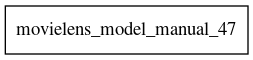

In [473]:
tf.keras.utils.plot_model(model)

In [474]:
print(b_dict)

     movie_id                 Categoria       Familia      user_id GENERO  \
0  b'1101342'  b'Caballeros Accesorios'  b'MESSENGER'  b'10867058'   b'F'   
1  b'1101004'  b'Caballeros Accesorios'      b'GORRA'  b'10571455'   b'F'   

  EDO_CIVIL             edad NDepen  
0      b'S'  b'(45.0, 55.0]'   b'0'  
1      b'S'  b'(35.0, 45.0]'   b'1'  


In [475]:
model = MovielensModelManual(concatmodeluser,concatmodelmovie)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

model.fit([b_dict["movie_id"].values,
           b_dict["Categoria"].values,b_dict["Familia"].values,
           b_dict["user_id"].values,b_dict["GENERO"].values,
          b_dict["EDO_CIVIL"].values,b_dict["edad"].values,
          b_dict["NDepen"].values], epochs=3)


#train_accuracy = model.evaluate(
 #   cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
#test_accuracy = model.evaluate(
 #   cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

#print(f"accuracy (train): {train_accuracy:.2f}.")
#print(f"accuracy (test): {test_accuracy:.2f}.")

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:595: UserWarning: Input dict contained keys ['id_Familia', 'Departamento', 'Clase', 'Subcategoria'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


Epoch 1/3
((<tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=string>),)
((<tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=string>, <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=string>),)
1/1 [=================

In [477]:
model(b_dict)

<tf.Tensor: shape=(2, 64), dtype=float32, numpy=
array([[ 9.23864357e-03,  6.01130500e-02,  1.01523753e-02,
        -1.09700486e-02, -6.13218127e-03, -5.86856306e-02,
        -2.28170045e-02,  6.04555011e-02, -3.01379785e-02,
         1.14757195e-03, -3.92622612e-02, -6.30867761e-03,
        -9.41578522e-02, -6.66186213e-02,  2.93231755e-02,
        -1.23519702e-02,  5.30418381e-02,  4.80518602e-02,
         2.07633935e-02,  4.47453111e-02,  2.64213793e-02,
        -2.40885299e-02, -2.53542718e-02,  5.32581136e-02,
         2.57446133e-02,  5.13501186e-03,  2.50215502e-03,
         1.43350735e-02, -4.23270389e-02,  1.32849384e-02,
        -1.22085875e-02, -7.56352162e-03,  2.21175738e-02,
        -7.84869306e-04, -5.28136715e-02, -7.58062601e-02,
        -2.76119541e-03,  8.29542615e-03, -2.66786218e-02,
        -1.09603591e-02,  6.25212193e-02,  1.34150991e-02,
         9.50722676e-03,  3.35759446e-02,  5.45933917e-02,
        -1.18861143e-02, -1.01663880e-01,  5.71900755e-02,
       

In [481]:
 {
       "movie_id":features["movie_id"],
       "Categoria": features["Categoria"],
        "Familia": features["Familia"]                                         
        }

NameError: name 'features' is not defined

In [484]:
dfprod=dfm[["movie_id","Categoria","Familia"]]
dfprod.shape

(1637, 3)

In [486]:
model.candidate_model([dfprod["movie_id"].values,
           dfprod["Categoria"].values,dfprod["Familia"].values]).numpy()

array([[ 0.05790213, -0.00492689, -0.06451681, ..., -0.01263477,
         0.0251468 , -0.03715834],
       [ 0.04652457,  0.04951176, -0.04372326, ...,  0.00209852,
        -0.03385424, -0.06120287],
       [ 0.04857187,  0.04195248, -0.01853467, ...,  0.01196784,
        -0.05345847, -0.04506944],
       ...,
       [-0.01170814, -0.02571183,  0.00034626, ...,  0.00509092,
         0.02288296,  0.01304264],
       [-0.02490262,  0.04672239,  0.00037117, ...,  0.0172393 ,
        -0.0208232 , -0.00891854],
       [-0.05546536, -0.0739369 ,  0.02026388, ..., -0.01122091,
         0.02992297,  0.07094554]], dtype=float32)

In [489]:
#!pip install annoy

     |████████████████████████████████| 646 kB 6.9 MB/s eta 0:00:01
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=393772 sha256=23bccac987fd0430f62b39bdee5166388269cda4fd86a82dd5af3f6d76551e02
  Stored in directory: /home/jupyter/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
Successfully built annoy


In [501]:
tempuser=model.query_model([b_dict["user_id"].values,b_dict["GENERO"].values,
          b_dict["EDO_CIVIL"].values,b_dict["edad"].values,
          b_dict["NDepen"].values]).numpy()[0]
tempuser

array([ 0.00923864,  0.06011305,  0.01015238, -0.01097005, -0.00613218,
       -0.05868563, -0.022817  ,  0.0604555 , -0.03013798,  0.00114757,
       -0.03926226, -0.00630868, -0.09415785, -0.06661862,  0.02932318,
       -0.01235197,  0.05304184,  0.04805186,  0.02076339,  0.04474531,
        0.02642138, -0.02408853, -0.02535427,  0.05325811,  0.02574461,
        0.00513501,  0.00250216,  0.01433507, -0.04232704,  0.01328494,
       -0.01220859, -0.00756352], dtype=float32)

In [503]:
from annoy import AnnoyIndex
import random

f = 32
t = AnnoyIndex(f, 'angular')  # Length of item vector that will be indexed
results = model.candidate_model([dfprod["movie_id"].values,
           dfprod["Categoria"].values,dfprod["Familia"].values]).numpy()
for i in range(results.shape[0]):
    v = v= results[i]
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('testreco.ann')

top_k=10
recomendaciones = t.get_nns_by_vector(tempuser, top_k, include_distances=False)
# ...

#u = AnnoyIndex(f, 'angular')
#u.load('test.ann') # super fast, will just mmap the file
#print(u.get_nns_by_item(0, 1000))

In [504]:
dfprod.loc[recomendaciones]

,movie_id,Categoria,Familia
390,b'1380284',b'Dama Joven',b'BASICA SM'
216,b'1309596',b'Dama Joven',b'SUETER LIGERO'
353,b'1329500',b'Dama Joven',b'SHORT'
393,b'1380550',b'Dama Joven',b'MANGA 3-4'
285,b'1319064',b'Dama Joven',b'BOY LONDON'
275,b'1317536',b'Dama Joven',b'VESTIR'
224,b'1310121',b'Dama Joven',b'CONJUNTO PANTS'
215,b'1309522',b'Dama Joven',b'SUDADERA LIGERA'
309,b'1323117',b'Dama Joven',b'FIESTA JUVENIL'
1216,b'2334008',b'Recamara',b'LAMINADO 1.20 M CONTEMPORANEO'


In [476]:
model.fit({"movie_id":b_dict["movie_id"].values,
           "Categoria":b_dict["Categoria"].values,"Familia":b_dict["Familia"].values,
           "user_id":b_dict["user_id"].values,"GENERO":b_dict["GENERO"].values,
          "EDO_CIVIL":b_dict["EDO_CIVIL"].values,"edad":b_dict["edad"].values,
          "NDepen":b_dict["NDepen"].values}, epochs=3)

Epoch 1/3
({'movie_id': <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=string>, 'Categoria': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=string>, 'Familia': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=string>, 'user_id': <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=string>, 'GENERO': <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=string>, 'EDO_CIVIL': <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=string>, 'edad': <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=string>, 'NDepen': <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=string>},)


KeyError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow_recommenders/models/base.py:68 train_step
        loss = self.compute_loss(inputs, training=True)
    <ipython-input-471-8811c25af5be>:21 compute_loss
        "user_id": features[0][0],

    KeyError: 0


In [ ]:
,b_dict["EDO_CIVIL"],b_dict["edad"],b_dict["NDepen"],b_dict["movie_id"],b_dict["Categoria"],b_dict["Familia"]]

In [ ]:
a_dict= dict(tfds.as_dataframe(shuffled.take(1)).loc[0])
b_dict=tfds.as_dataframe(shuffled.take(1))[["movie_id","Categoria","Familia"]].loc[0]
value = tf.constant(b_dict["movie_id"])
print(value)
moviemod = MovieModel([value,value,value])
moviemod.build(input_shape=[3])
print(moviemod)

In [ ]:
model = MovielensModel(use_timestamps=False)
a_dict= dict(tfds.as_dataframe(shuffled.take(1)).loc[0])
b_dict=tfds.as_dataframe(shuffled.take(1))[["movie_id","Categoria","Familia"]].loc[0]

model.moviemod(b_dict)
print(model.moviemod.summary())

model(a_dict)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))
model(a_dict)

In [ ]:

model.fit(cached_train, epochs=3)

train_accuracy = model.evaluate(
    cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
test_accuracy = model.evaluate(
    cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

print(f"Top-100 accuracy (train): {train_accuracy:.2f}.")
print(f"Top-100 accuracy (test): {test_accuracy:.2f}.")

In [ ]:
tfds.as_dataframe(shuffled.take(1)).head()


In [ ]:
model = MovielensModel(use_timestamps=True)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

model.fit(cached_train, epochs=3)

train_accuracy = model.evaluate(
    cached_train, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]
test_accuracy = model.evaluate(
    cached_test, return_dict=True)["factorized_top_k/top_100_categorical_accuracy"]

print(f"accuracy (train): {train_accuracy:.2f}.")
print(f"accuracy (test): {test_accuracy:.2f}.")

In [ ]:
model.evaluate(cached_test, return_dict=True)

In [ ]:
MovielensModel

In [ ]:
#model.summary()
index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)

In [ ]:
hello = tf.constant(dfr.loc[0]["movie_id"])
print(model.moviemod.intermediate_model(hello))
print(model.moviemod.title_embedding(hello))
xxx = {
       "movie_id":[dfr.loc[0]["movie_id"]],
       "Categoria": [dfr.loc[0]["Categoria"]],
        "Familia": [dfr.loc[0]["Familia"]]
}
print(dict(dfr.loc[0]))
hello_dict = tf.data.Dataset.from_tensor_slices(dfr[0:2].to_dict("list"))
print(hello_dict)
print(model.moviemod(hello_dict))
model.fit(cached_train, epochs=3)
cached_train


In [ ]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
# recommends movies out of the entire movies dataset.
index.index(movies.map(lambda x: x["movie_id"]).batch(100).map(model.candidate_model), movies.map(lambda x: x["movie_id"]))

# Get recommendations.
#_, titles = index(tf.constant(["42"]))
#print(f"Recommendations for user 42: {titles[0, :3]}")

In [ ]:
!pip install -q scann


In [ ]:
import scann

In [ ]:
!pip freeze | grep tensorflow-recommenders

In [ ]:
 import pkgutil
 [name for _, name, _ in pkgutil.iter_modules(["tfrs.layers.factorized_top_k"])]

In [ ]:
import pkgutil  
import tensorflow_recommenders.layers.factorized_top_k as tpk
[name for _, name, _ in pkgutil.iter_modules(["tpk"])]

In [ ]:
import importlib
importlib.reload(tfrs)

In [ ]:

import tensorflow_recommenders.layers.factorized_top_k as tpk
import inspect


for name, obj in inspect.getmembers(tpk):
    if inspect.isclass(obj):
        print(obj)

In [ ]:
scann_index = tfrs.layers.factorized_top_k.ScaNN(model.query_model)
scann_index.index(movies.batch(100).map(model.candidate_model), movies)

In [ ]:
#p(tfrs.layers.factorized_top_k)

In [ ]:
# Get recommendations.
_, titles = scann_index(tf.constant(["42"]))
print(f"Recommendations for user 42: {titles[0, :3]}")

In [ ]:
from platform import python_version

print(python_version())

In [ ]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(model.candidate_model)
# recommends movies out of the entire movies dataset.
#index.index(movies.batch(100).map(model.query_model), movies.map(lambda x:x['movie_id']))

# Get recommendations.
#_, titles = index(tf.constant(["42"]))
#print(f"Recommendations for user 42: {title[0, :3]}")

In [ ]:
movies.map(lambda x:x['Familia'])

In [ ]:
index = tfrs.layers.factorized_top_k.BruteForce(model.candidate_model)

index.index(movies.batch(100).map(model.query_model), movies.map(lambda x:x['Familia']))
#index.index(movies.batch(100).map(model.query_model), movies.map(lambda x:x['movie_id']))
#_,titles = index({"user_id":["32"],"user_occupation_label":[20]})

#print(f"Top 3 recommendations for user 32: {titles[0, :3]}")

In [ ]:
# Export the query model.
with tempfile.TemporaryDirectory() as tmp:
  path = os.path.join(tmp, "model")

  # Save the index.
  index.save(path)

  # Load it back; can also be done in TensorFlow Serving.
  loaded = tf.keras.models.load_model(path)

  # Pass a user id in, get top predicted movie titles back.
  scores, titles = loaded(["42"])

  print(f"Recommendations: {titles[0][:3]}")

In [ ]:
index

In [ ]:
!pip install -q scann 

In [ ]:
scann_index = tfrs.layers.factorized_top_k.ScaNN(model.query_model)
scann_index.index(movies.batch(100).map(model.candidate_model), movies)

In [ ]:
# Get recommendations.
_, titles = scann_index(tf.constant(["42"]))
print(f"Recommendations for user 42: {titles[0, :3]}")

In [ ]:
# Use brute-force search to set up retrieval using the trained representations.

index = tfrs.layers.factorized_top_k.BruteForce(use_timestamps=False)
index.index(movies.batch(500).map(model.movie_model), movies)

# Get some recommendations.
_, titles = index(np.array(["42"]))
print(f"Top 3 recommendations for user 42: {titles[0, :3]}")

In [ ]:
class MovielensModel(tfrs.Model):

  def __init__(self, user_model, movie_model):
    super().__init__()
    self.movie_model: tf.keras.Model = movie_model
    self.user_model: tf.keras.Model = user_model
    self.task: tf.keras.layers.Layer = task

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["user_id","GENERO","EDO_CIVIL"])
    # And pick out the movie features and pass them into the movie model,
    # getting embeddings back.
    positive_movie_embeddings = self.movie_model(features["movie_title"])

    # The task computes the loss and the metrics.
    return self.task(user_embeddings, positive_movie_embeddings)

In [ ]:
user_model = tf.keras.Sequential([
    user_ids_vocabulary,
    tf.keras.layers.Embedding(user_ids_vocabulary.vocab_size(), 1000)
])
movie_model = tf.keras.Sequential([
    movie_titles_vocabulary,    
    tf.keras.layers.Embedding(movie_titles_vocabulary.vocab_size(), 1000)
])

# Define your objectives.
task = tfrs.tasks.Retrieval(metrics=tfrs.metrics.FactorizedTopK(
    movies.batch(28).map(movie_model)
  )
)

In [ ]:
model.user_model.predict(np.array(["138"]))

In [ ]:
model.build()

In [ ]:
model.predict(1)

In [ ]:
# Get some recommendations.
_, titles = index(np.array(["34"]))
print(f"Top 3 recommendations for user 42: {titles[0, :50]}")

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
# Randomly shuffle data and split between train and test.
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

In [ ]:
# Train.
model.fit(train.batch(4096), epochs=5)

In [ ]:
# Evaluate.
model.evaluate(test.batch(4096), return_dict=True)